<a href="https://colab.research.google.com/github/metaundefined/Garbage_classification/blob/main/Project_klasifikasi_sampah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengekstrak Data Set
# 1. Upload file DataSet.zip ke direktori

from zipfile import ZipFile

file_name = "/content/Dataset3.zip"

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

print('Done')

Done


cardboard34.jpg
cardboard59.jpg
cardboard383.jpg
cardboard132.jpg
cardboard88.jpg
cardboard68.jpg
cardboard36.jpg
cardboard85.jpg
cardboard13.jpg
cardboard35.jpg
cardboard252.jpg
cardboard354.jpg
cardboard359.jpg
cardboard338.jpg
cardboard403.jpg
cardboard211.jpg
cardboard161.jpg
cardboard111.jpg
cardboard296.jpg
cardboard180.jpg
cardboard377.jpg
cardboard78.jpg
cardboard122.jpg
cardboard242.jpg
cardboard270.jpg
cardboard302.jpg
cardboard164.jpg
cardboard284.jpg
cardboard52.jpg
cardboard230.jpg
cardboard328.jpg
cardboard74.jpg
cardboard223.jpg
cardboard54.jpg
cardboard138.jpg
cardboard188.jpg
cardboard312.jpg
cardboard25.jpg
cardboard229.jpg
cardboard399.jpg
cardboard163.jpg
cardboard288.jpg
cardboard200.jpg
cardboard51.jpg
cardboard300.jpg
cardboard95.jpg
cardboard115.jpg
cardboard214.jpg
cardboard333.jpg
cardboard370.jpg
cardboard176.jpg
cardboard145.jpg
cardboard185.jpg
cardboard246.jpg
cardboard81.jpg
cardboard42.jpg
cardboard57.jpg
cardboard160.jpg
cardboard234.jpg
cardboard30.jpg

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,693 (37.84 MB)

 Trainable params: 3,306,897 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,796 (25.23 MB)

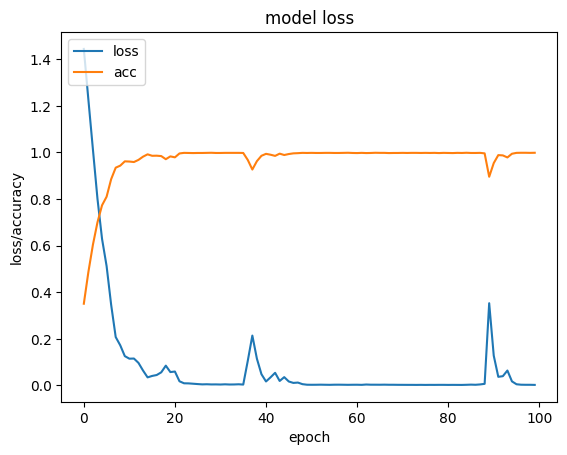

In [ ]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

def LoadCitraTraining(sDir,LabelKelas):
  JumlahKelas=len(LabelKelas)
  TargetKelas = np.eye(JumlahKelas)
# Menyiapkan variabel list untuk data menampung citra dan data target
  X=[]#Menampung Data Citra
  T=[]#Menampung Target
  for i in range(len(LabelKelas)):
    #Membaca file citra di setiap direktori data set
    DirKelas = os.path.join(sDir, LabelKelas[i])
    files = os.listdir(DirKelas)

    for f in files:
      ff=f.lower()
      print(f)
      #memilih citra dengan extensi jpg,jpeg,dan png
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         NmFile = os.path.join(DirKelas,f)
         #membaca citra berwarna sebagai data bertipe double
         img= np.double(cv2.imread(NmFile,1))
         img=cv2.resize(img,(128,128));
         #Normalisasi data citra menjadi sehingga maksimum menjadi 1
         img= np.asarray(img)/255;
         img=img.astype('float32')
         #Menambahkan citra dan target ke daftar
         X.append(img)
         T.append(TargetKelas[i])
     #--------akhir loop :Pfor f in files-----------------
  #-----akhir  loop :for i in range(len(LabelKelas))----

  #Mengubah List Menjadi numppy array
  X=np.array(X)
  T=np.array(T)
  X=X.astype('float32')
  T=T.astype('float32')
  return X,T

def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100,activation='relu')(x)
    x = Dense(100,activation='relu')(x)
    x=Dense(JumlahKelas,activation='softmax')(x)
    ModelCNN = Model(input_img, x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #ModelCNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

def TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas,NamaFileBobot ='weight.h5' ):
    #Membaca Data training dan label Kelas
    X,D=LoadCitraTraining(DirektoriDataSet,LabelKelas)
    JumlahKelas = len(LabelKelas)
    #Membuat Model CNN
    ModelCNN =ModelDeepLearningCNN(JumlahKelas)
    #Trainng
    history=ModelCNN.fit(X, D,epochs=JumlahEpoh,shuffle=True)
    #Menyimpan hasil learning
    ModelCNN.save(NamaFileBobot)
    #Mengembalikan output
    return ModelCNN,history


##########################################################
def Klasifikasi(DirDataSet,DirKlasifikasi,LabelKelas,ModelCNN=[]):
#Apabila parameter input ModelCNN tidak di isi maka
#   akan menggunakan bobot pada file 'weight.h5
  if not(ModelCNN):
      ModelCNN = load_model('weight.h5')

#Menyiapkan Data input Yang akan di kasifikasikan
  X=[]
  ls = [];
  DirKelas = DirDataSet+"\\"+DirKlasifikasi
  print(DirKelas)
  files = os.listdir(DirKelas)
  n=0;
  for f in files:
      ff=f.lower()
      print(f)
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         ls.append(ff)
         NmFile = os.path.join(DirKelas,f)
         img= cv2.imread(NmFile,1)
         img=cv2.resize(img,(128,128))
         img= np.asarray(img)/255
         img=img.astype('float32')
         X.append(img)
     #----Akhir if-------------
  #---Akhir For
  X=np.array(X)
  X=X.astype('float32')
  #Melakukan prediksi Klasifikasi
  hs=ModelCNN.predict(X)

  LKlasifikasi=[];
  LKelasCitra =[];
  n = X.shape[0]
  for i in range(n):
      v=hs[i,:]
      if v.max()>0.5:
          idx = np.max(np.where( v == v.max()))
          LKelasCitra.append(LabelKelas[idx])
      else:
          idx=-1
          LKelasCitra.append("-")
      #------akhir if
      LKlasifikasi.append(idx);
  #----akhir for
  LKlasifikasi = np.array(LKlasifikasi)
  return ls, hs, LKelasCitra

#****************
#  Program Utama
#****************

###############################################
#  1, Training CNN
#----------------------------------------------
#a. Menentukan Direktori Yang menyimpan Data set
DirektoriDataSet="/content/Garbage classification"
#   Data Set disimpan dalam direktori yang sama dengan nama kelas

#b. Label Data Set
LabelKelas = [
    "cardboard","glass","metal","paper","plastic"
]

#c. Inisialisasi parameter Training
JumlahEpoh = 100;
FileBobot = "WRambu.h5"
#d. training
ModelCNN,history = TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas ,FileBobot)
ModelCNN.summary()

#c. Menampilkan Grafik Loss dan accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('model loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()


Saving paper1.jpg to paper1.jpg


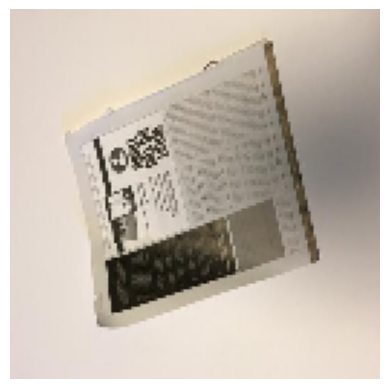

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
paper1.jpg => Predicted Garbage: paper


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Label kelas sesuai model yang sudah dilatih
LabelKelas = ["cardboard","glass","metal","paper","plastic"]

uploaded = files.upload()

for fn in uploaded.keys():
  # Load dan tampilkan gambar
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Pra-pemrosesan citra
  x = image.img_to_array(img)
  x = x / 255.0  # normalisasi
  x = np.expand_dims(x, axis=0)

  # Prediksi
  classes = ModelCNN.predict(x)
  pred_idx = np.argmax(classes[0])
  pred_label = LabelKelas[pred_idx]

  print(f'{fn} => Predicted Garbage: {pred_label}')


In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("server_62RJ6QW3Z5GZSXNYONAABASU-APNGV5L6O45NJWZ2")

In [ ]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

ModelCNN = load_model('WRambu.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["cardboard","glass","metal","paper","plastic"]

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(128, 128))  # Sesuaikan jika model pakai ukuran lain
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = ModelCNN.predict(img_array)
        pred_index = np.argmax(prediction[0])
        pred_label = LabelKelas[pred_index]

        return pred_label

In [ ]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
